In [170]:
import cv2
import easyocr
import imutils
import numpy as np
from matplotlib import pyplot as plt

### Loading the images

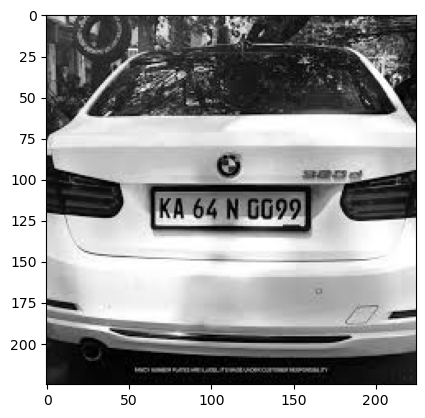

In [171]:
img = cv2.imread("bm.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Noise reduction and filtering

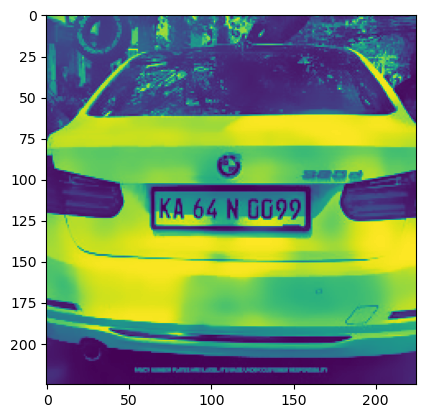

In [172]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
plt.imshow(bfilter)

### Edge detection

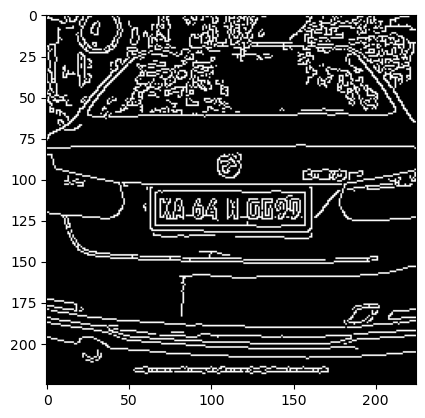

In [173]:
edged = cv2.Canny(bfilter, 30, 200)    # (30, 200) params allows us to see the edges clearly
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Contour Detection (identify the rectangle that contains the plate number)

In [174]:
key_points = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #find the shapes in edged, the result is in the form of a tree "RETR_TREE" of simplified contours)
key_points

((array([[[ 59, 214]],
  
         [[ 58, 215]],
  
         [[ 54, 215]],
  
         [[ 53, 216]],
  
         [[ 54, 217]],
  
         [[ 59, 217]],
  
         [[ 60, 218]],
  
         [[ 61, 218]],
  
         [[ 62, 217]],
  
         [[ 76, 217]],
  
         [[ 75, 216]],
  
         [[ 76, 215]],
  
         [[ 81, 215]],
  
         [[ 82, 214]],
  
         [[ 83, 214]],
  
         [[ 84, 215]],
  
         [[ 85, 214]],
  
         [[ 86, 215]],
  
         [[ 86, 216]],
  
         [[ 85, 217]],
  
         [[ 78, 217]],
  
         [[ 94, 217]],
  
         [[ 95, 218]],
  
         [[ 96, 218]],
  
         [[ 95, 218]],
  
         [[ 94, 217]],
  
         [[ 89, 217]],
  
         [[ 88, 216]],
  
         [[ 89, 215]],
  
         [[ 96, 215]],
  
         [[ 98, 217]],
  
         [[103, 217]],
  
         [[104, 218]],
  
         [[105, 218]],
  
         [[106, 217]],
  
         [[119, 217]],
  
         [[118, 216]],
  
         [[119, 215]],
  
         [[1

In [175]:
contours = imutils.grab_contours(key_points)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]  #return the top 10 contours
contours

[array([[[ 68, 107]],
 
        [[ 67, 108]],
 
        [[ 66, 108]],
 
        [[ 66, 128]],
 
        [[127, 128]],
 
        [[128, 129]],
 
        [[142, 129]],
 
        [[143, 128]],
 
        [[157, 128]],
 
        [[157, 108]],
 
        [[143, 108]],
 
        [[142, 107]],
 
        [[137, 107]],
 
        [[136, 108]],
 
        [[119, 108]],
 
        [[118, 107]],
 
        [[ 71, 107]],
 
        [[ 70, 108]],
 
        [[ 69, 107]]], dtype=int32),
 array([[[ 68, 107]],
 
        [[ 69, 107]],
 
        [[ 70, 108]],
 
        [[ 71, 107]],
 
        [[118, 107]],
 
        [[119, 108]],
 
        [[136, 108]],
 
        [[137, 107]],
 
        [[142, 107]],
 
        [[143, 108]],
 
        [[156, 108]],
 
        [[157, 109]],
 
        [[157, 127]],
 
        [[156, 128]],
 
        [[143, 128]],
 
        [[142, 129]],
 
        [[128, 129]],
 
        [[127, 128]],
 
        [[123, 128]],
 
        [[122, 127]],
 
        [[122, 126]],
 
        [[122, 127]],
 
   

In [176]:
# now trying to identify the contourss that represent a rectangle
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)  #approximate the polygone of our contour
    if len(approx) == 4:         # the contour has 4 keypoints
        location = approx
        break

In [177]:
location   #the coordinates of where our number plate is 

array([[[ 66, 108]],

       [[ 66, 128]],

       [[157, 128]],

       [[157, 108]]], dtype=int32)

### Applying the Mask to Isolate the target licence plate 

In [178]:
mask = np.zeros(gray.shape, np.uint8)    #blank mask
plate = cv2.drawContours(mask, [location], 0, 255, -1)    #selecting the rectangle
plate = cv2.bitwise_and(img, img, mask=mask)           #isolating the rectangle

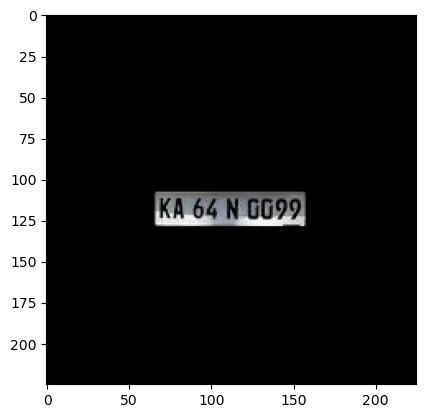

In [179]:
plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))

### Cropping the licence plate

In [180]:
(x, y) = np.where(mask == 255)   # selecting the section where the image is not black
(x1, y1) = (np.min(x), np.min(y))           #selecting the top left corner point 
(x2, y2) = (np.max(x), np.max(y))           #selecting the lower right corner point 
cropped_plate = gray[x1:x2+1, y1:y2+1] # now select the rectangle (x1:x2+1, y1:y2+1)
cropped_plate

array([[ 65, 125, 135, ...,  88,  80,  51],
       [ 78, 117, 117, ..., 102,  97,  70],
       [101, 127, 123, ..., 112, 105,  78],
       ...,
       [151, 234, 222, ..., 206, 198, 107],
       [140, 243, 254, ..., 201, 207, 128],
       [ 52, 121, 146, ..., 209, 213,  63]], dtype=uint8)

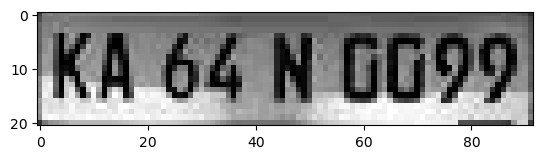

In [181]:
plt.imshow(cv2.cvtColor(cropped_plate, cv2.COLOR_BGR2RGB))

### Reading the text using EasyOCR

In [182]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_plate)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [92, 0], [92, 21], [0, 21]], 'Ka 64 N 0G9Q', 0.45888040909889405)]

### Rendering the identified text

In [183]:
text = result[0][-2]
text = text[:]
text

'Ka 64 N 0G9Q'

In [184]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+20), fontFace=font, fontScale=0.5, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 2)

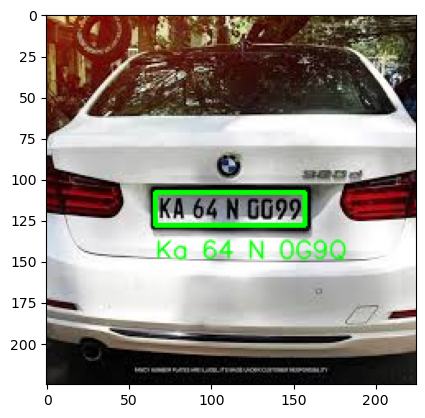

In [185]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))